In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
def generate_chirp_signal(
        chirp_turns=256,
        chirp_repetitions=500,
        chirp_rep_time=0.001,
        turn_freq=470151.0308,
        chirp_start_freq=2e4,
        chirp_stop_freq=8e4,
        sampling_freq=1e6):
    """
    Generate a chirp signal for the simulation.
    ---
    Returns:
    time_samples: np.ndarray [s]
        Time samples of the signal
    signal_samples: np.ndarray [1]
        Signal samples
    ---
    Parameters:
    chirp_turns: int [1]
        Number of turns that one chirp lasts for. Default: 256
    chirp_repetitions: [1]
        Number of chirp repetitions. Default: 500
    chirp_rep_time: float [s]
        Time between chirp repetitions. Default: 0.001 (1ms)
    turn_freq: float [Hz]
        Frequency of one turn in the machine. Default: 470151.0308
    chirp_start_freq: float [Hz]
        Start frequency of the chirp. Default: 2e4
    chirp_stop_freq: float [Hz]
        Stop frequency of the chirp. Default: 8e4
    sampling_freq: float [Hz]
        Sampling frequency of the signal. Default: 1e6
    """
    total_signal_time = chirp_repetitions * chirp_rep_time
    chirp_length_time = chirp_turns / turn_freq
    # Generate one chirp
    chirp_time_samples = np.arange(0, chirp_length_time, 1/sampling_freq)
    chirp_signal_samples = sp.signal.chirp(chirp_time_samples, chirp_start_freq, chirp_length_time, chirp_stop_freq)

    # Generate one repetition
    rep_time_samples = np.arange(0, chirp_rep_time, 1/sampling_freq)[:-1] # cut off the end for the next repetition
    rep_signal_samples = np.pad(chirp_signal_samples, 
                                (0, int(chirp_rep_time * sampling_freq - chirp_length_time * sampling_freq)), 
                                'constant', 
                                constant_values=(0, 0))
    
    # Generate full signal
    time_samples = np.arange(0, total_signal_time, 1/sampling_freq)[:-1] # cut off the end for the next repetition
    signal_samples = np.pad(
        rep_signal_samples,
        (0, len(rep_signal_samples)*(chirp_repetitions-1)),
        'wrap'
    )
    return time_samples, signal_samples



In [63]:
CHIRP_TURNS = 256
CHIRP_REPETITIONS = 500
CHIRP_REP_TIME = 0.001

TOTAL_SIGNAL_TIME = CHIRP_REPETITIONS * CHIRP_REP_TIME

TURN_FREQUENCY = 470151.0308

SAMPLING_FREQUENCY = 1000000

CHIRP_TIME = 1/TURN_FREQUENCY * CHIRP_TURNS

START_FREQ = 2e4
STOP_FREQ = 8e4

In [64]:
chirp_time_samples = np.arange(0, CHIRP_TIME, 1/SAMPLING_FREQUENCY)

In [65]:
chirp = sp.signal.chirp(chirp_time_samples, START_FREQ, CHIRP_TIME, STOP_FREQ)

In [67]:
ms_signal = np.pad(chirp, (0, int(CHIRP_REP_TIME * SAMPLING_FREQUENCY - CHIRP_TIME * SAMPLING_FREQUENCY)), 'constant', constant_values=(0, 0))
ms_time = np.arange(0, CHIRP_REP_TIME, 1/SAMPLING_FREQUENCY)[:-1]


In [68]:
len(ms_time)

1000

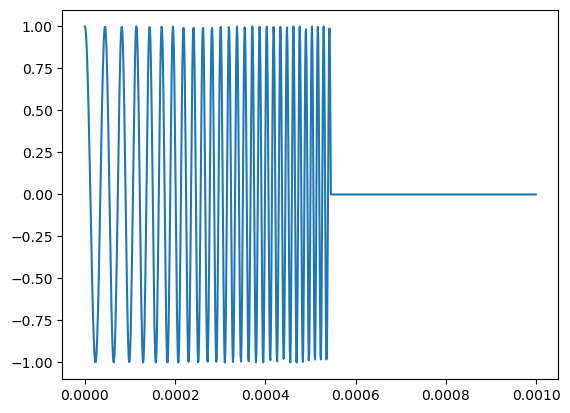

In [69]:
# plot ms_signal
fig, ax = plt.subplots()
ax.plot(ms_time, ms_signal)

In [70]:
full = np.pad(ms_signal, (0, len(ms_signal)*(CHIRP_REPETITIONS-1)), mode='wrap')

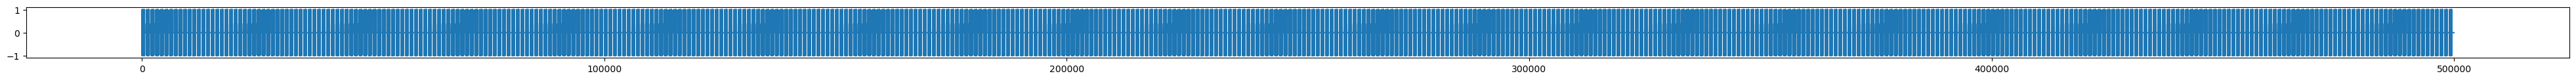

In [71]:
fig, ax = plt.subplots(figsize=(50, 1))
ax.plot(full)